In [9]:
import pandas as pd

#Load csv datasets
users = r"C:\Users\vaitl\OneDrive\Desktop\Fetch Rewards\USER_TAKEHOME.csv"
products = r"C:\Users\vaitl\OneDrive\Desktop\Fetch Rewards\PRODUCTS_TAKEHOME.csv"
transaction = r"C:\Users\vaitl\OneDrive\Desktop\Fetch Rewards\TRANSACTION_TAKEHOME.csv"

In [10]:
#Read the data in csv files
users_df=pd.read_csv(users)
products_df=pd.read_csv(products)
transaction_df=pd.read_csv(transaction)

print("File Loaded")

File Loaded


In [11]:
# Displaying few rows to verify the loading
print("Users Data:")
print(users_df.head())

Users Data:
                         ID               CREATED_DATE  \
0  5ef3b4f17053ab141787697d  2020-06-24 20:17:54.000 Z   
1  5ff220d383fcfc12622b96bc  2021-01-03 19:53:55.000 Z   
2  6477950aa55bb77a0e27ee10  2023-05-31 18:42:18.000 Z   
3  658a306e99b40f103b63ccf8  2023-12-26 01:46:22.000 Z   
4  653cf5d6a225ea102b7ecdc2  2023-10-28 11:51:50.000 Z   

                  BIRTH_DATE STATE LANGUAGE  GENDER  
0  2000-08-11 00:00:00.000 Z    CA   es-419  female  
1  2001-09-24 04:00:00.000 Z    PA       en  female  
2  1994-10-28 00:00:00.000 Z    FL   es-419  female  
3                        NaN    NC       en     NaN  
4  1972-03-19 00:00:00.000 Z    PA       en  female  


In [12]:
print("Products Data:")
print(products_df.head())

Products Data:
          CATEGORY_1              CATEGORY_2                   CATEGORY_3  \
0  Health & Wellness           Sexual Health  Conductivity Gels & Lotions   
1             Snacks           Puffed Snacks         Cheese Curls & Puffs   
2  Health & Wellness               Hair Care        Hair Care Accessories   
3  Health & Wellness               Oral Care                   Toothpaste   
4  Health & Wellness  Medicines & Treatments               Essential Oils   

  CATEGORY_4                                       MANUFACTURER  \
0        NaN                                                NaN   
1        NaN                                                NaN   
2        NaN                           PLACEHOLDER MANUFACTURER   
3        NaN                                  COLGATE-PALMOLIVE   
4        NaN  MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...   

             BRAND       BARCODE  
0              NaN  7.964944e+11  
1              NaN  2.327801e+10  
2          ELE

In [14]:
print("Transactions Data:")
print(transaction_df.head())

Transactions Data:
                             RECEIPT_ID PURCHASE_DATE  \
0  0000d256-4041-4a3e-adc4-5623fb6e0c99    2024-08-21   
1  0001455d-7a92-4a7b-a1d2-c747af1c8fd3    2024-07-20   
2  00017e0a-7851-42fb-bfab-0baa96e23586    2024-08-18   
3  000239aa-3478-453d-801e-66a82e39c8af    2024-06-18   
4  00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1    2024-07-04   

                   SCAN_DATE STORE_NAME                   USER_ID  \
0  2024-08-21 14:19:06.539 Z    WALMART  63b73a7f3d310dceeabd4758   
1  2024-07-20 09:50:24.206 Z       ALDI  62c08877baa38d1a1f6c211a   
2  2024-08-19 15:38:56.813 Z    WALMART  60842f207ac8b7729e472020   
3  2024-06-19 11:03:37.468 Z  FOOD LION  63fcd7cea4f8442c3386b589   
4  2024-07-05 15:56:43.549 Z   RANDALLS  6193231ae9b3d75037b0f928   

        BARCODE FINAL_QUANTITY FINAL_SALE  
0  1.530001e+10           1.00             
1           NaN           zero       1.49  
2  7.874223e+10           1.00             
3  7.833997e+11           zero       3.49  
4  

In [16]:
#checking for missing values in datasets
print("Missing Values in Users Data:")
print(users_df.isnull().sum())

print("\nMissing Values in Transactions Data:")
print(transaction_df.isnull().sum())

print("\nMissing Values in Products Data:")
print(products_df.isnull().sum())

Missing Values in Users Data:
ID                  0
CREATED_DATE        0
BIRTH_DATE       3675
STATE            4812
LANGUAGE        30508
GENDER           5892
dtype: int64

Missing Values in Transactions Data:
RECEIPT_ID           0
PURCHASE_DATE        0
SCAN_DATE            0
STORE_NAME           0
USER_ID              0
BARCODE           5762
FINAL_QUANTITY       0
FINAL_SALE           0
dtype: int64

Missing Values in Products Data:
CATEGORY_1         111
CATEGORY_2        1424
CATEGORY_3       60566
CATEGORY_4      778093
MANUFACTURER    226474
BRAND           226472
BARCODE           4025
dtype: int64


In [19]:
#check for duplicate records in datasets

print("Duplicate rows in Users Data: ")
print(users_df.duplicated().sum())

print("\nDuplicate rows in Products Data: ")
print(products_df.duplicated().sum())

print("\nDuplicate rows in Transaction Data: ")
print(transaction_df.duplicated().sum())

Duplicate rows in Users Data: 
0

Duplicate rows in Products Data: 
215

Duplicate rows in Transaction Data: 
171


In [20]:
#check for inconsistent Datatypes

print("Data Types in Users Data:")
print(users_df.dtypes)

print("\nData Types in Transactions Data:")
print(transaction_df.dtypes)

print("\nData Types in Products Data:")
print(products_df.dtypes)

Data Types in Users Data:
ID              object
CREATED_DATE    object
BIRTH_DATE      object
STATE           object
LANGUAGE        object
GENDER          object
dtype: object

Data Types in Transactions Data:
RECEIPT_ID         object
PURCHASE_DATE      object
SCAN_DATE          object
STORE_NAME         object
USER_ID            object
BARCODE           float64
FINAL_QUANTITY     object
FINAL_SALE         object
dtype: object

Data Types in Products Data:
CATEGORY_1       object
CATEGORY_2       object
CATEGORY_3       object
CATEGORY_4       object
MANUFACTURER     object
BRAND            object
BARCODE         float64
dtype: object


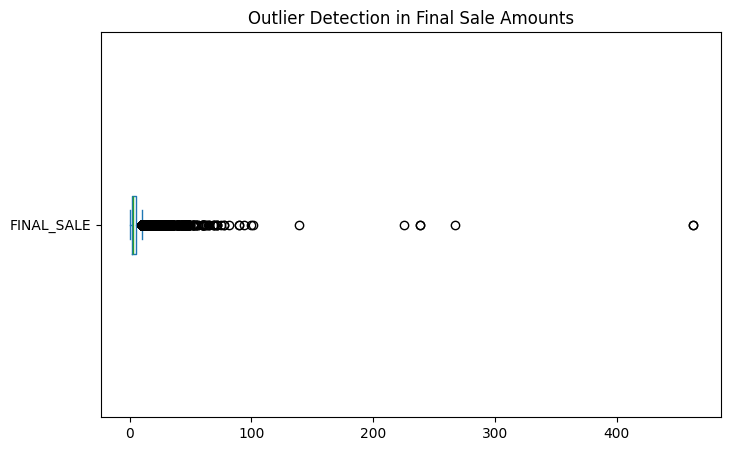

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure FINAL_SALE is numeric
transaction_df["FINAL_SALE"] = pd.to_numeric(transaction_df["FINAL_SALE"], errors="coerce")

# Drop NaN values if any exist after conversion
transaction_df = transaction_df.dropna(subset=["FINAL_SALE"])

# Plot the box plot
plt.figure(figsize=(8,5))
transaction_df["FINAL_SALE"].plot(kind="box", vert=False)
plt.title("Outlier Detection in Final Sale Amounts")
plt.show()

In [23]:
#To identify potential anomalies

print("Potential anomalies in Users Data:")
print(users_df.nunique())

print("\nPotential anomalies in Transactions Data:")
print(transaction_df.nunique())

print("\nPotential anomalies in Products Data:")
print(products_df.nunique())

Potential anomalies in Users Data:
ID              100000
CREATED_DATE     99942
BIRTH_DATE       54721
STATE               52
LANGUAGE             2
GENDER              11
dtype: int64

Potential anomalies in Transactions Data:
RECEIPT_ID        24440
PURCHASE_DATE        89
SCAN_DATE         24440
STORE_NAME          954
USER_ID           17694
BARCODE           11027
FINAL_QUANTITY       87
FINAL_SALE         1434
dtype: int64

Potential anomalies in Products Data:
CATEGORY_1          27
CATEGORY_2         121
CATEGORY_3         344
CATEGORY_4         127
MANUFACTURER      4354
BRAND             8122
BARCODE         841342
dtype: int64
